# Tutorial notebook of [`PartialRejectionSampling.jl`](https://guilgautier.github.io/PartialRejectionSampling.jl)

We illustrate **Partial Rejection Sampling (PRS)** on several **point processes**.

PRS is a **methodology** which allows to **generate exact samples** from product distribution subject to some **constraints**.

The main documentation of [`PartialRejectionSampling.jl`](https://guilgautier.github.io/PartialRejectionSampling.jl) can be found at [![][docs-dev-img]][docs-dev-url]

[docs-dev-img]: https://img.shields.io/badge/docs-dev-blue.svg
[docs-dev-url]: https://guilgautier.github.io/PartialRejectionSampling.jl/dev

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graph-point-processes" data-toc-modified-id="Graph-point-processes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graph point processes</a></span><ul class="toc-item"><li><span><a href="#Hard-core-model-a.k.a.-uniform-independent-set" data-toc-modified-id="Hard-core-model-a.k.a.-uniform-independent-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hard core model a.k.a. uniform independent set</a></span></li><li><span><a href="#Sink-free-graph" data-toc-modified-id="Sink-free-graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sink-free graph</a></span></li><li><span><a href="#Rooted-spanning-forest" data-toc-modified-id="Rooted-spanning-forest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rooted spanning forest</a></span></li><li><span><a href="#Ising" data-toc-modified-id="Ising-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ising</a></span><ul class="toc-item"><li><span><a href="#Grid-partial-rejection-sampling" data-toc-modified-id="Grid-partial-rejection-sampling-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Grid partial rejection sampling</a></span></li><li><span><a href="#Perfect-Gibbs-sampler" data-toc-modified-id="Perfect-Gibbs-sampler-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Perfect Gibbs sampler</a></span></li></ul></li></ul></li><li><span><a href="#Spatial-point-processes" data-toc-modified-id="Spatial-point-processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spatial point processes</a></span><ul class="toc-item"><li><span><a href="#Hard-core-point-process" data-toc-modified-id="Hard-core-point-process-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hard core point process</a></span><ul class="toc-item"><li><span><a href="#Partial-rejection-sampling" data-toc-modified-id="Partial-rejection-sampling-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Partial rejection sampling</a></span></li><li><span><a href="#Grid-partial-rejection-sampling" data-toc-modified-id="Grid-partial-rejection-sampling-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Grid partial rejection sampling</a></span></li><li><span><a href="#Dominated-CFTP" data-toc-modified-id="Dominated-CFTP-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Dominated CFTP</a></span></li></ul></li><li><span><a href="#Strauss-point-process" data-toc-modified-id="Strauss-point-process-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Strauss point process</a></span><ul class="toc-item"><li><span><a href="#Partial-rejection-sampling-=-Grid-partial-rejection-sampling" data-toc-modified-id="Partial-rejection-sampling-=-Grid-partial-rejection-sampling-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Partial rejection sampling = Grid partial rejection sampling</a></span></li><li><span><a href="#Dominated-CFTP" data-toc-modified-id="Dominated-CFTP-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Dominated CFTP</a></span></li></ul></li></ul></li><li><span><a href="#Miscellaneous" data-toc-modified-id="Miscellaneous-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Miscellaneous</a></span><ul class="toc-item"><li><span><a href="#Pattern-free-string" data-toc-modified-id="Pattern-free-string-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pattern free string</a></span><ul class="toc-item"><li><span><a href="#Extremal-case" data-toc-modified-id="Extremal-case-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Extremal case</a></span></li><li><span><a href="#General-case" data-toc-modified-id="General-case-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>General case</a></span></li></ul></li></ul></li></ul></div>

Uncomment and run the cell below if the corresponding packages are not installed on your system.

In [1]:
#] add LightGraphs Plots GraphPlot Colors

In [2]:
using PartialRejectionSampling  # const PRS = PartialRejectionSampling is exported

using LightGraphs
const LG = LightGraphs

# Required in plot_utils.jl Plots GraphPlot Colors
include("plot_utils.jl");

┌ Info: Precompiling PartialRejectionSampling [462d7af4-98e5-4ce7-aadc-1f465a3a6705]
└ @ Base loading.jl:1278


## Graph point processes

For illustration purposes, we consider a [grid graph](https://en.wikipedia.org/wiki/Lattice_graph).

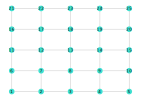

In [3]:
dims = [5, 5]
g = LG.grid(dims)

plot(g, dims)

### Hard core model a.k.a. uniform independent set

Point process on the vertices of a graph, parametrized by $\beta \geq 0$ which characterizes the distribution on the [independent sets](https://en.wikipedia.org/wiki/Independent_set_(graph_theory)) of the graph, where each vertex is present with marginal probability $\beta/(1+\beta)$.

**See also**

- Section 7.2 of [GuJeLi19](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/),
- Example 4.1 of [MoKr20](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/),
- [Spatial hard core point process](#Hard-core-point-process)

┌ Warning: The arguments do not satisfy Theorem 35 of Guo, Jerrum and Liu (2019).
│ Partial rejection sampling may not be efficient.
│ Given `graph`, consider choosing β ≤ 0.08203600120549888
└ @ PartialRejectionSampling /Users/ggautier/.julia/dev/PartialRejectionSampling/src/graph/hard_core.jl:119


  1.118213 seconds (1.84 M allocations: 93.532 MiB, 2.92% gc time)


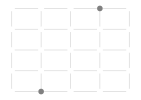

In [4]:
dims = [5, 5]
g = LG.grid(dims)
β = 0.1

hcg = PRS.HardCoreGraph(g, β)

@time sample = PRS.generate_sample_prs(hcg)

plot(hcg, sample, dims; nodelabel=nothing)

### Sink-free graph

Point process on the edges of a graph characterizing the uniform distribution on the orientations of the edges conditioned on the absence of sinks.

**See also**

- Section 4.1 of [GuJeLi19](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/).

In [5]:
dims = [5, 5]
g = LG.grid(dims)
roots = [1, 5]

sfg = PRS.SinkFreeGraph(g)

SinkFreeGraph{SimpleDiGraph{Int64}}
- graph = {25, 40} undirected simple Int64 graph

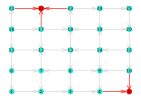

In [6]:
g_oriented = PRS.random_edge_orientation(sfg.graph)
plot(sfg, g_oriented, dims)

  0.100063 seconds (177.59 k allocations: 9.316 MiB)


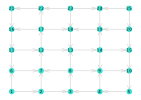

In [7]:
@time sample = PRS.generate_sample_prs(sfg)

plot(sfg, sample, dims)

### Rooted spanning forest

Point process defined on the edges of a graph, characterizing the uniform distribution on the directed [spanning forests](https://en.wikipedia.org/wiki/Spanning_tree) of the graph, with prescribed roots.

**See also**

- Section 4.2 of [GuJeLi19](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/).

In [8]:
dims = [5, 5]
g = LG.grid(dims)
roots = [5]

rsf = PRS.RootedSpanningForest(g, roots)

RootedSpanningForest{SimpleDiGraph{Int64}}
- graph = {25, 40} undirected simple Int64 graph
- roots = [5]

Starting from a random oriented graph, where each node is linked to one of its neighbors uniformly at random

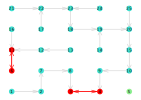

In [9]:
g_oriented = PRS.random_neighbor_assignment(rsf.graph, roots)

plot(rsf, g_oriented, dims)

Use PRS to sample a rooted spanning forest uniformly at random

  0.117526 seconds (113.99 k allocations: 6.802 MiB, 25.87% gc time)


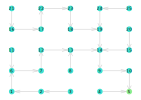

In [10]:
@time sample = PRS.generate_sample_prs(rsf)

plot(rsf, sample, dims)

Compare it with [Wilson's algorithm](https://en.wikipedia.org/wiki/Loop-erased_random_walk#Uniform_spanning_tree)

  0.057070 seconds (43.22 k allocations: 2.022 MiB)


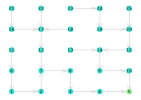

In [11]:
@time sample = PRS._generate_sample_rooted_spanning_forest_wilson(g, roots)

plot(rsf, sample, dims)

### Ising

The [Ising model](https://en.wikipedia.org/wiki/Ising_model) characterizes a point process defined on the vertices of a graph $(V, E)$ with joint density proportional to

$$
    \mathbb{P}\!\left[ \mathcal{X}=X \right]
    \propto
    \prod_{i \in V}
        \exp(h_i x_i)
    \prod_{\{i, j\} \in E}
        \exp(J x_i x_j)
$$

where $(h_i)_{i\in V}$ are called magnetization paremeters and $J$ the interaction coefficient ($J \gtreqless 0$ characterizes ferro/antiferro magnetic interactions).

In [12]:
dims = [14, 14] # if > (14, 14) the display becomes all black, don't know why !
periodic = false
H, J = 0.0, 0.01

ising = PRS.Ising(dims, J, H; periodic=periodic)

Ising{Int64}
- graph = {196, 364} undirected simple Int64 graph
- J = 0.01 (interaction)
- h = 0.0 (magnetization)

#### Grid partial rejection sampling

One can apply the grid Partial Rejection Sampling methodology (grid PRS) of [MoKr20](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)

Originally developped for spatial gibbs processes, see [Spatial point processes](#Spatial-point-processes), we propose a specific version for the Ising model.

  0.775298 seconds (1.51 M allocations: 78.137 MiB, 3.37% gc time)


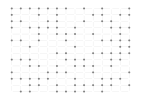

In [13]:
@time sample = PRS.generate_sample_grid_prs(ising)

plot(ising, sample, dims; nodelabel=nothing)

#### Perfect Gibbs sampler

Comparison with the perfect Gibbs sampler of [FeGuYi19](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/) (a smart modification of the Gibbs sampler which yields exact samples).

  0.624733 seconds (348.04 k allocations: 17.641 MiB)


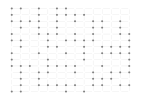

In [14]:
@time sample = PRS.generate_sample_gibbs_perfect(ising)

plot(ising, sample, dims; nodelabel=nothing)

## Spatial point processes

For now, Partial Rejection Sampling (PRS) applies to spatial pairwise Gibbs point processes with finite interaction range.

### Hard core point process

Spatial point process with density (w.r.t. the homogenous Poisson point process with unit intensity) proportional to

$$
    \prod_{x \in X}
        \beta
    \prod_{\{x, y\} \subseteq X}
        1_{ \left\| x - y \right\|_2 > r },
$$

- $\beta > 0$ is called the background intensity
- $r > 0$ the interaction range.


It can be viewed as
- a homogeneous [Poisson point process](https://en.wikipedia.org/wiki/Poisson_point_process) with intensity $\beta$, conditioned to having no pair of points at distance less than $r$,
- a [Strauss point process](#Strauss-point-process) with interaction coefficient $\gamma=0$.

**See also**
- [Discrete hard core model](#Hard-core-model-a.k.a.-uniform-independent-set)

In [15]:
β₀ = 0.1
r = 0.05  # interaction range = 2*radius
b = β₀ / (π * (r/2)^2)
win = PRS.SquareWindow()

hc = PRS.HardCorePointProcess(b, r, win)

HardCorePointProcess{Array{Float64,1}}
- β = 50.929581789406505
- r = 0.05
- window = SquareWindow [0.0, 1.0]^2

#### Partial rejection sampling

Generate exact samples using Partial Rejection Sampling (PRS) of [GuJe18](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/).

  7.270956 seconds (11.39 M allocations: 537.661 MiB, 5.70% gc time)


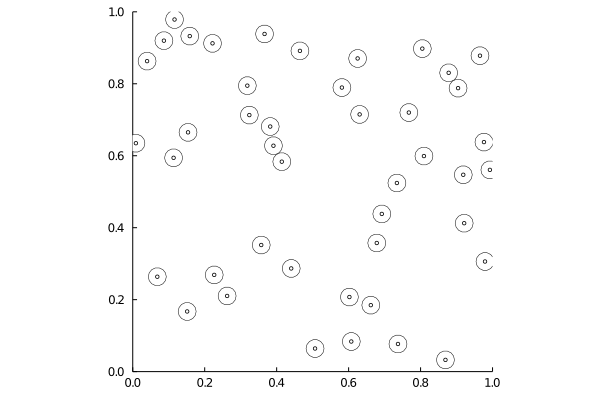

In [16]:
@time sample = PRS.generate_sample_prs(hc)

plot(hc, sample; show_center=true, radius=hc.r/2)

#### Grid partial rejection sampling

Apply the grid Partial Rejection Sampling methodology (grid PRS) of [MoKr20](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/).

  3.454821 seconds (7.25 M allocations: 355.327 MiB, 3.65% gc time)


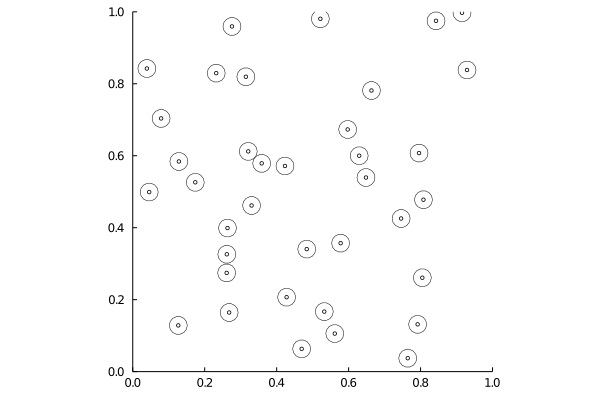

In [17]:
@time sample = PRS.generate_sample_grid_prs(hc)

plot(hc, sample; show_center=true, radius=hc.r/2)

#### Dominated CFTP

A generic methodology for sampling from point processes is called dominated Coupling From The Past (dominated CFTP)

**See also**

- [KeMo99](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/), [KeMo00](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)
- Section 11.2.6 [MoWa04](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)

  0.628155 seconds (1.56 M allocations: 78.128 MiB, 3.67% gc time)


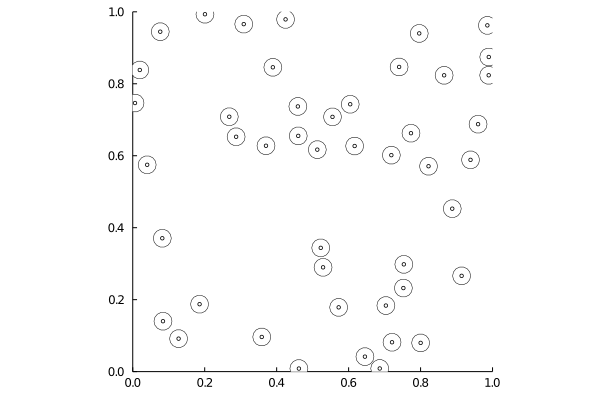

In [18]:
@time sample = PRS.generate_sample_dcftp(hc)

plot(hc, sample; show_center=true, radius=hc.r/2)

### Strauss point process

Spatial point process with density (w.r.t. the homogenous Poisson point process with unit intensity) proportional to

$$
    \prod_{x \in X}
        \beta
    \prod_{\{x, y\} \subseteq X}
        \gamma^{ 1_{ \left\| x - y \right\|_2 \leq r } }
    =
    \beta^{|X|}
    \gamma^{|\{\{x, y\} \subseteq X ~;~ \left\| x - y \right\|_2 \leq r\}|},
$$

with intensity $\beta > 0$, interaction coefficient $0\leq \gamma\leq 1$ and interaction range $r > 0$.

- $\gamma = 0$ corresponds to the [Hard core point process](#Hard-core-point-process) with parameter $\beta$,
- $\gamma = 1$ corresponds to the homogeneous [Poisson point process](https://en.wikipedia.org/wiki/Poisson_point_process) with intensity $\beta$.

#### Partial rejection sampling = Grid partial rejection sampling

Contrary to the [hard core point process](#Hard-core-point-process), Partial Rejection Sampling cannot be applied directly.

Instead the grid Partial Rejection Sampling methodology (grid PRS) of [MoKr20](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/) plays the role of partial rejection sampler.

In [19]:
β₀ = 0.2
γ = 0.1  # 0.0 = hard core
r = 0.01  # interaction range = 2*radius
β = β₀ / (π * (r/2)^2)

win = PRS.SquareWindow()

strauss = PRS.StraussPointProcess(β, γ, r, win)

StraussPointProcess{Array{Float64,1}}
- β = 2546.4790894703256
- γ = 0.1
- r = 0.01
- window = SquareWindow [0.0, 1.0]^2

  0.878050 seconds (2.06 M allocations: 135.525 MiB, 5.05% gc time)


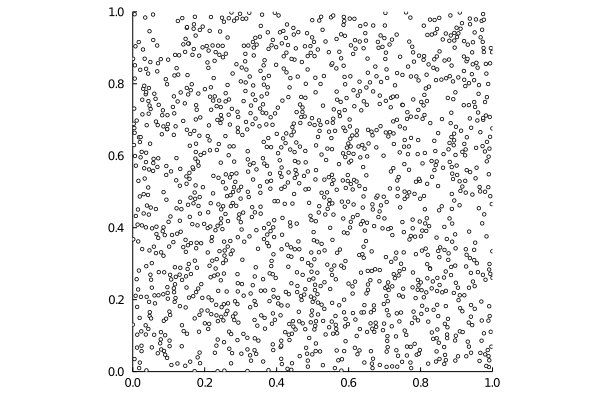

In [20]:
@time sample = PRS.generate_sample_grid_prs(strauss)

plot(strauss, sample; show_center=true)

#### Dominated CFTP

A generic methodology for sampling from point processes is called dominated Coupling From The Past (dominated CFTP)

**See also**

- [KeMo99](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/), [KeMo00](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)
- Section 11.2.6 [MoWa04](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)

We consider the experimental setup used in slide 9 of [E. Rubak](https://www-ljk.imag.fr/membres/Jean-Francois.Coeurjolly/documents/lecture4.pdf)

In [21]:
β, γ, r = 2.0, 0.2, 0.7  # γ = 0 ≡ Hard core

c, w = [0.0, 0.0], 10.0
win = PRS.SquareWindow(c, w)

strauss = PRS.StraussPointProcess(β, γ, r, win)

StraussPointProcess{Array{Float64,1}}
- β = 2.0
- γ = 0.2
- r = 0.7
- window = SquareWindow [0.0, 10.0]^2

  0.273495 seconds (36.92 k allocations: 5.910 MiB)


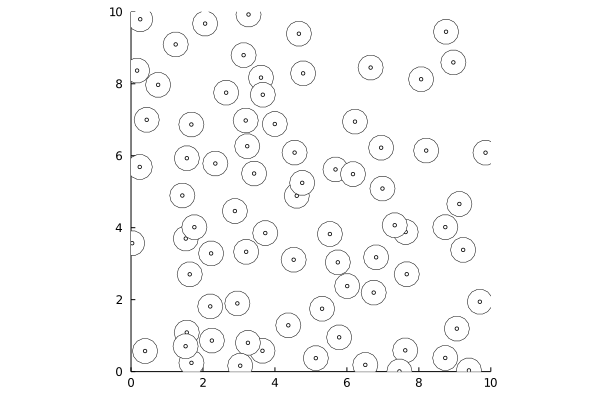

In [22]:
@time sample = PRS.generate_sample_dcftp(strauss)

plot(strauss, sample; show_center=true, radius=strauss.r/2)

## Miscellaneous

### Pattern free string

Generate (uniformly at random) strings made of characters from a given alphabet with the absence of a prescribed pattern.

**See also**
-  Technical report of [GiAmWe18](https://guilgautier.github.io/PartialRejectionSampling.jl/dev/references/)

#### Extremal case

The pattern has **no** common prefix-suffix

In [23]:
alphabet = ["A", "C", "G", "T"]
pattern = "ATCG"

pfs = PRS.PatternFreeString(pattern, alphabet)

PatternFreeString{String}
- pattern = ATCG
- alphabet = ["A", "C", "G", "T"]

In [24]:
size = 1000
@time PRS.generate_sample_prs(pfs, size)

  0.416283 seconds (707.19 k allocations: 34.166 MiB)


"ACACTGGTTTCGTGTTGACGACCAGTTTGTCACGGTATCTTTGTTCTATTACCTATTTAGTAATGGACAAATTCATATGTAGGACCATGTGTGAACTGCAACACTTTCCTGAATAAACTCTATAACGGATCTAGATCTAAACCCGACACAATATGGCGGTTTCACCTCGCGTCAGCGCTCTGAAGGGCTTGCTAGTTTGGCCTCCGCATGTAGGGCAGGTGCGCATTGTGTTTTATGCTGGATCACGCCGCGGCGGGTCTGAGAATGTCGCATGATTCGGAGGTTCGCGTAACGATTGTAGCGTAGCACATCAGGTGGCCCTATGGCATCCTTACGCTTGCAAACTCTTGGTGGGCCAGGAACACTTGTAGTGTGATAAGACCGCACTATAAGCTAGAGTTGGCAACAGAAATAACCATTTCCAGTTCGAGATGTTGGCCTGCCTGGCTGCTTGGAGGACTGTCACAGTCTATCTCCAACTGGCCTGCTGAGACAATAGAGATCTGGGAATGAAGAACCCCCGGACATGAATTTACCGCGTGCCAACACGCGCGCTAATCCTTCGCGGCCATACTTCGGTCGGGGCCCAGCGGGGCTCTCGAACGTGGGCACTGCAGACGAATGCCGAGGCACCTTAGAAACGTCTATATTCACCAACCCAATCCAAGAAAGGCACGCGCCTGACTGTATGGTCATGCACCAAGTAGTACAATAAACAGTATTAAAACTTGTCATGCCACGTTTAGCTTCCCAGGGATCCAACTTTGGAACCCAACTCTACGTCGTTTAGGTCATGCCGAGGTTTCCGAGGCCGAACTGTCCAGCTGCGTTTTTCTTGTGGATCAATCACGACCCATCCTAAGGATCTCACCCCTACCCCCAGGTACAACTACGTGCATGAAAGCCTGACCGTACAGGCCATGTTAATTCGGATGGCTTGTATAACCAACCGGCCTGTGCATAAGGGACAGGGCCTATAACGGGCTTCGTAATGGACAG

In [25]:
@time PRS.generate_sample_prs(pfs, size)

  0.000056 seconds (19 allocations: 10.688 KiB)


"GCGCCCCAAAGTTTAGGCTTTACGTTACACTGTAATTACTAAGTTAAACCCAGTGGGCAGAAGATGGGGAGTATGGATCTCGTACGCTAGATCTAGACGGGGTGGAAGTGGCAGTGCCCACTATTCCATGTCGCGAATGTACCGGGTGAACGTGTCTCATAGCAAAGCCAGATATGCTGGCTCATCCGGCATTTTCAAAGAGTGAGATTGTTTGTAAACGGGGTAATTAATTAAGCTGTGACCTACATTCTTATACAGCGTCCGAAGCTTAGCCGAGCCCTCATAAGTTGGTACCGCAGCAGCTCGATTGTCACCTCAATAGTTTTAGGCGCTTAAGAACCAGCCATGGTCAGCCATTCTGTGTTTTTCAAAACTACGGAGAGCTGAGTCGCACAACCACATAGGAGGACCCGAGTTGGCCGACGGCTCCATATGTTATCCGCACAGCCCTATAGGATACTCTTTCTCCAAGAATAGACCATACCACCCCTTTCTTTACTAGCGTGTCCATCATCTCCAAACGGGTCGTGAGGCCTCTGCGCATGCATGCATTACTTTCATCCAACTGATGCGCGGGAAGCACCCATACGTTGCTGCCCCTCCCTTGTCGGGGCGAACGATATGGGGGTACCTAAAAAATCATAACACGTAAGATATTATGTGTCCACTACTGCAGCTCCTTATGAAAAAAGGTGGTTCCCCCTAAACCCAGGAGTCTGAATGCAAATTCGTCGGTTTGGGCTGGTGAAACCACGCCTGCTTGAAAAACATGAAGAAGCCAAAGATTAGCACCCCGCGCTGGCTGCATTTGGGAACCGATTACTCACATCCAGCGGTCTGCTCATTTCAAAACGGGGTCAAGCGGCATGAAGCACTACACTAACAAGGACGTACGGCATAGCGAGATTAACTGTCGATTTAAAGTAGGAGATACTGTTGACGCCGCCTTGAGCTAACGTTAGCGAGGAATAGGCCACGGCCGGACTTTGCGTGACACCG

#### General case

The pattern has common prefix-suffix

In [26]:
alphabet = ["A", "C", "G", "T"]
pattern = "ATAT"

pfs = PRS.PatternFreeString(pattern, alphabet)

PatternFreeString{String}
- pattern = ATAT
- alphabet = ["A", "C", "G", "T"]

In [28]:
size = 1000
@time PRS.generate_sample_prs(pfs, size)

  0.000202 seconds (193 allocations: 34.188 KiB)


"AATGATTAAAAGTGTGTGAAGTAAGTAAACGATTTTTCATGTCCTCAATCTGAGAGCAATTATGAATTCGGCCCTTGCGGTGCCAATCGTAACATCTTTACACTTGACCGACTACCGGTAAATCTTGTCTTCCCATAATAGACAGATACCGGAACCCACATCCACACTGGGACAAGGTCGCCCGAGTGTGTTATCCCGTCCCTGTTGGGGATCAATACCCGGTGCCCGGGCAGGACACTTAACGTAGCGTTGAGCGCGGATGATTGCCTTGTACCAAAGCGGTCCGTGGATGCTACCCCATTGCCCTTGTCCGACCATTTGCCTTACATCAAGAGGGATTTTTTTCACAGCCCTGCAAGCCTTTTCGTGAACGATCTCCCTCTTTAAAGAACAACGAATAGGCCATCATGGCAGATGTTCACTGCCGGGTTGTCAACTGAGTCATAGCTACGAGGCAGTGGTGATAAGGCGGGTACTCCTAGCAAACCACGTGCTGCATTTCCAACATTATTCACAATTCACTAGCCTTGCATCTAGCTGAATGGAACTTCGTTCTATAGCCACTATTTCGATTCAGAGGCGCCAGCCGGGGATGTTGCCTTTATGCGGTAACCAATCACCCGTGTATCGGCGGTCTATACGACCCATGACTCCTAATTCTAATTTGCGCAGTATTGATGTACTCGTTCCCATCGCCAGGCGGTAGAATAGGTCGACCAGGTGGTAGGCCCCCTTGAACAAGATTACTTATTTTCCGGATGTGAAGAACAGGTCTAAAGCGTACGACAAGGCGCTAGTCTGTCGTCGCTATTCACCATTCACGAGCGTCTTTGAGACCAGCTAGCGGAATTCACACTTTAAGCCGACGGTGCCGACCCAGCTGACGATTTGAAACACTTGCTGTCCGTAGTAGACAGCATACAATTCCCTGAGCTACGCGATTGCGTCTCAACTCTTTCAGCGGGTCACTCCGGGGCCGGCACTGATAGCTAGCTTTTA